# DS 3000 HW 4

Due: Tuesday Nov 21 @ 11:59 PM EST

### Submission Instructions
You will may submit up to two files for this assignment. This `ipynb` file should have answers to the programming questions, and you could include the answers to the math problems as well either via LaTeX typesetting in Markdown cells, or by embedding images of your written work. If you would rather work on the math problems separately, you may also submit a pdf file with your handwritten answers to the math problems. To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to Gradescope.

### Tips for success
- Start early
- Make use of Piazza (also accessible through Canvas)
- Make use of Office Hours
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (*not* show each other your answers to) the problems.

# Part 1: Computation by Hand

For each of the sub-parts below, you must show all math work/steps (no matter how trivial) to receive full credit. You may either use LaTeX typesetting within a Markdown cell, or do it by hand with pen and paper and embed the image in this .ipynb file, or submit a separate pdf file with your handwritten work. Round all decimals to three places. name:

## Part 1.1: Matrix Multiplication (5 points)

Using the below matrices, perform the following operations by hand, **then** perform the same operations in your notebook using `numpy`. If an operation cannot be done, still write the code but then comment it out before running and submitting your final .ipynb file.

$$A = \begin{bmatrix}
-3 & 8 \\
0 & 5
\end{bmatrix}$$

$$B = \begin{bmatrix}
2 & -7 \\
6 & -1 \\
-9 & 4 \end{bmatrix}$$

$$C = \begin{bmatrix}
-6 & 0 & 5 \\
1 & 3 & -2 \\
7 & -5 & -8 \\
4 & 9 & -10
\end{bmatrix}$$

$$D = \begin{bmatrix}
-4 & 0 & 3 \\
8 & -2 & 5 \\
6 & -3 & 1
\end{bmatrix}$$

$$e = \begin{bmatrix}
7 \\
-8 \\
10 \\
-1
\end{bmatrix}$$

- $AB^T$
- $CD$
- $DB$
- $Ce$
- $e^TC$

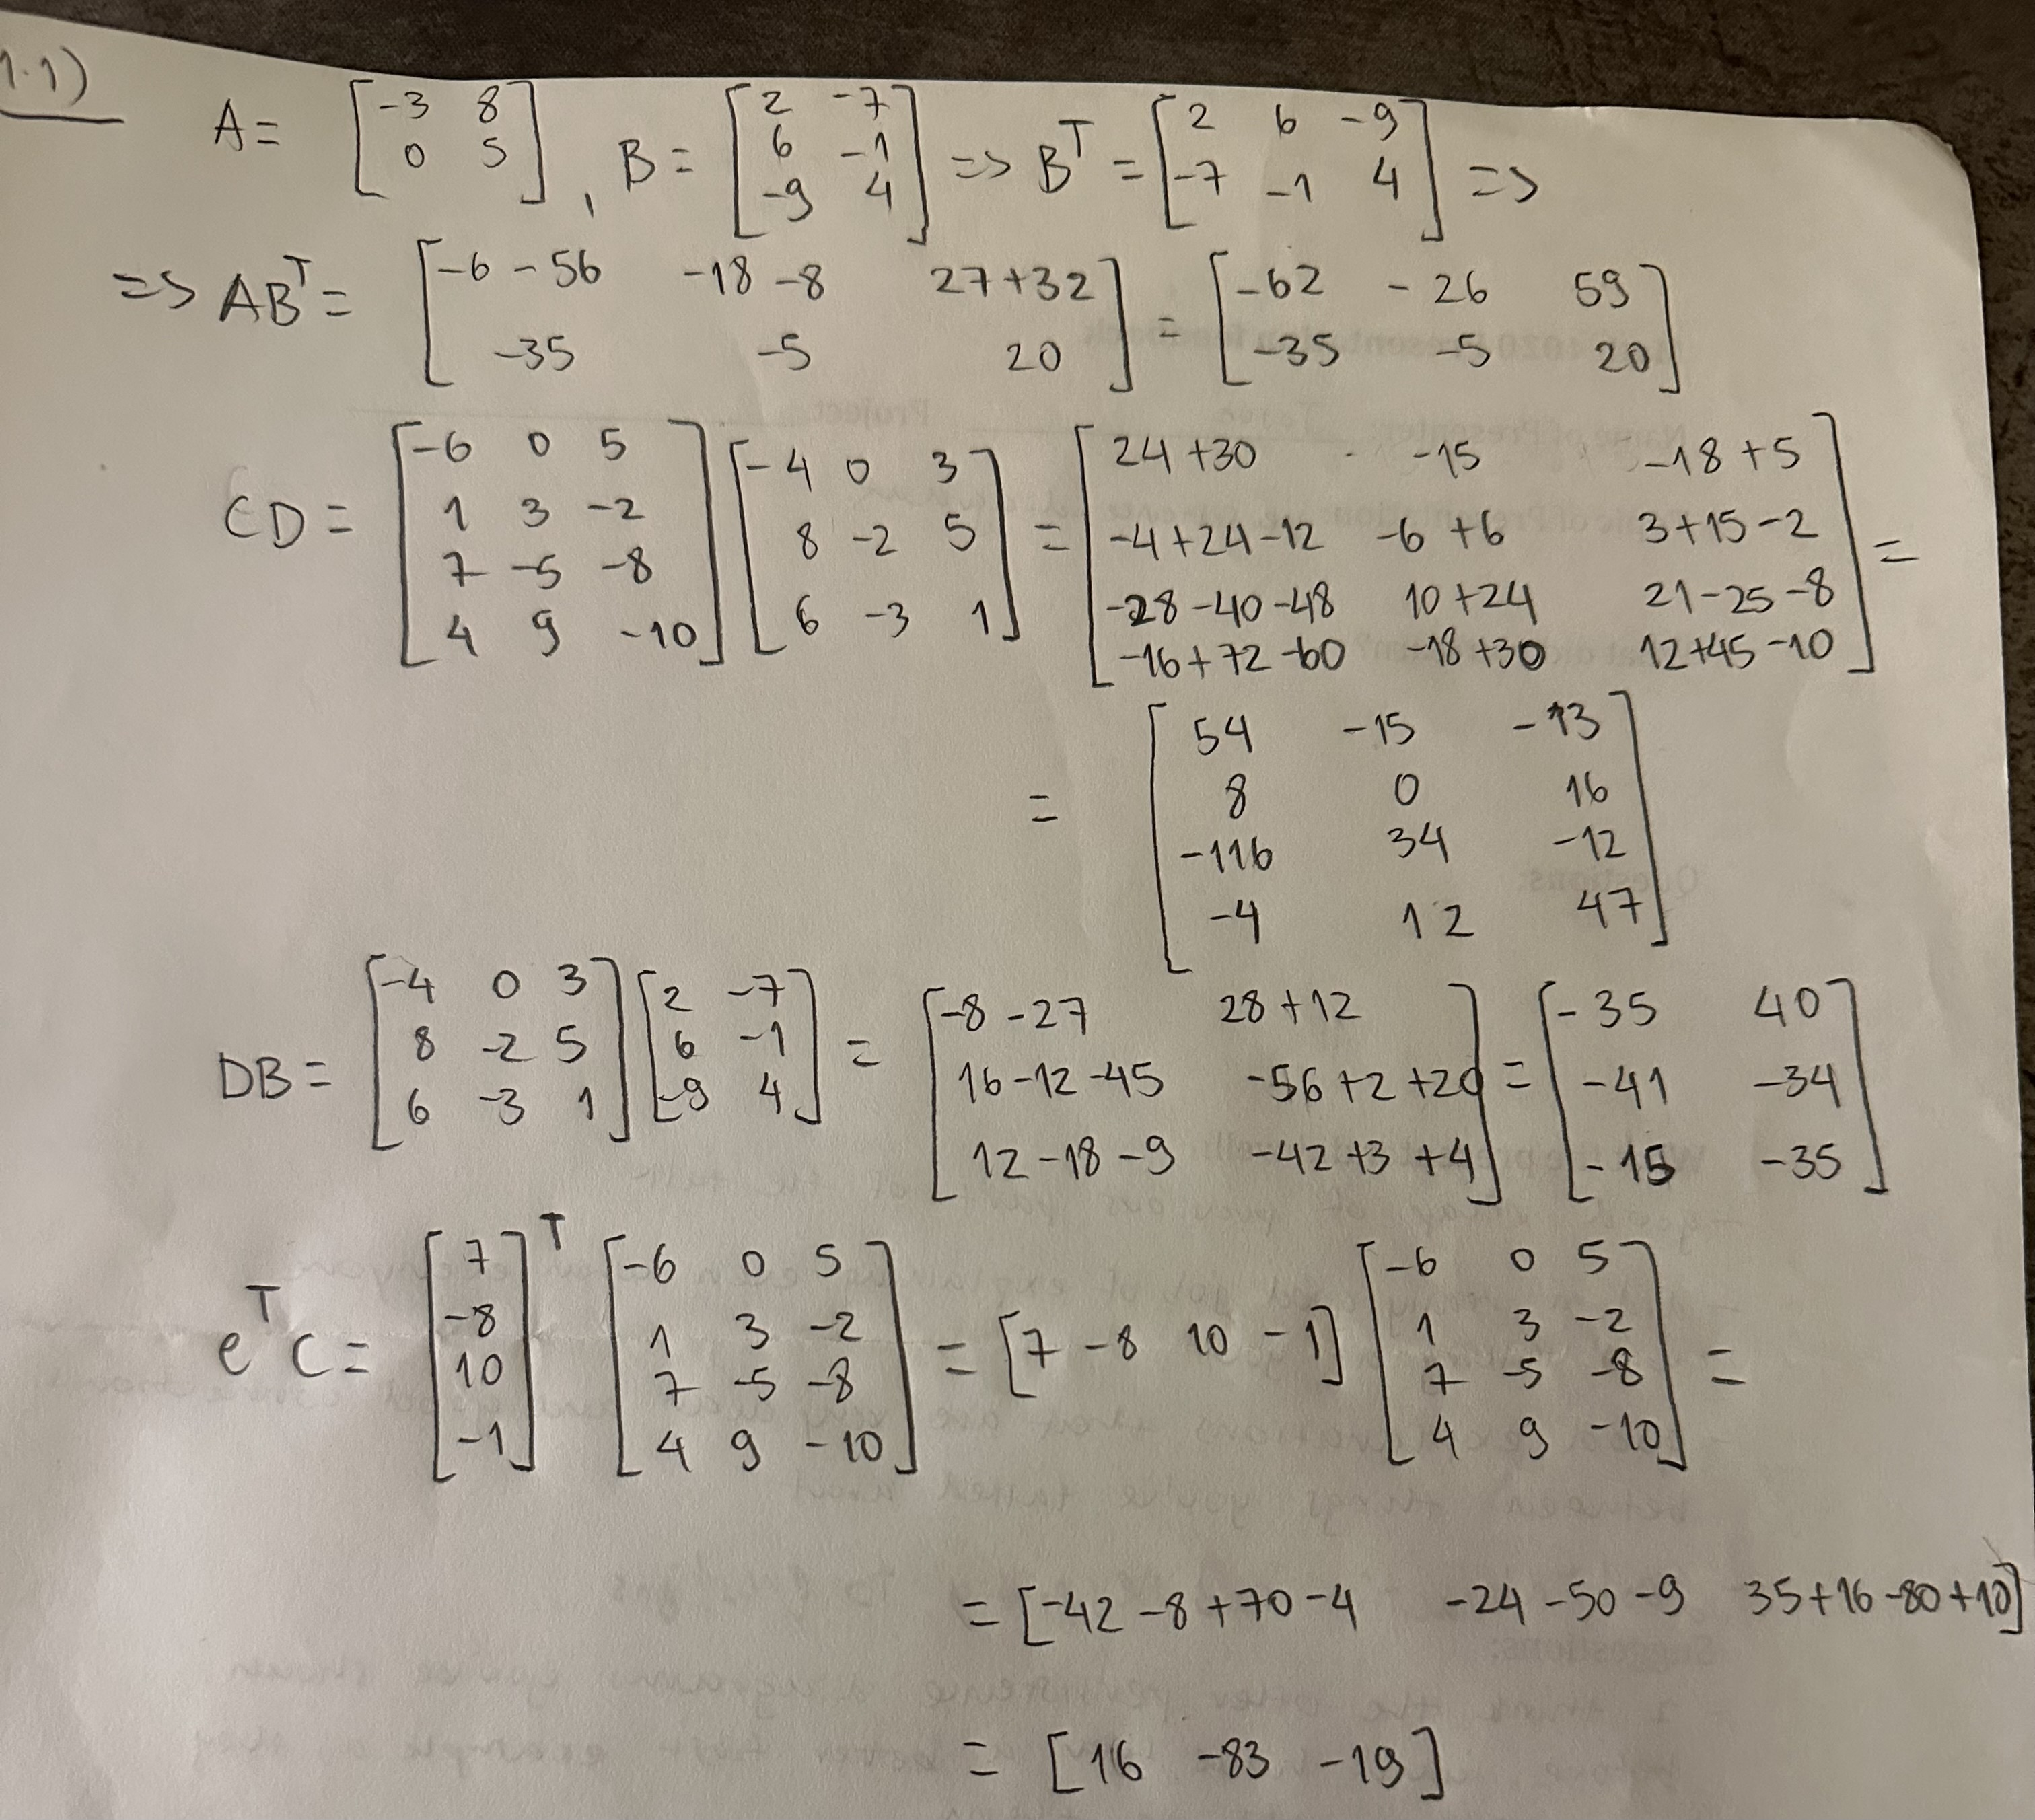

In [1]:
import numpy as np

A = np.array([[-3, 8], [0, 5]])
B = np.array([[2, -7], [6, -1], [-9, 4]])
print(np.matmul(A, B.T))

C = np.array([[-6, 0, 5], [1, 3, -2], [7, -5, -8], [4, 9, -10]])
D = np.array([[-4, 0, 3], [8, -2, 5], [6, -3, 1]])
print(np.matmul(C, D))

print(np.matmul(D, B))

E = np.array([[7], [-8], [10], [-1]])
print(np.matmul(E.T, C))

[[-62 -26  59]
 [-35  -5  20]]
[[  54  -15  -13]
 [   8    0   16]
 [-116   34  -12]
 [  -4   12   47]]
[[-35  40]
 [-41 -34]
 [-15 -35]]
[[ 16 -83 -19]]


## Part 1.2: Spans, Linear In/Dependence, Orthogonality (5 points)

Based on the following three vectors, answer the ensuing questions, making sure to write out all supporting work with by hand or in a markdown cell. You may use `numpy` to help you check some of your answers, if you wish, but all work must be done by hand and provided for full credit.

$$a = \begin{bmatrix} 8 \\ -2 \end{bmatrix}$$
$$b = \begin{bmatrix} 1 \\ 4 \end{bmatrix}$$
$$c = \begin{bmatrix} -3 \\ .75 \end{bmatrix}$$

- What is the span of $a$ and $b$?
- What is the span of $a$ and $c$?
- Are the vectors $a$ and $b$ linearly independent or dependent?
- Is the set of all three vectors linearly independent or dependent?
- Which vectors are orthogonal to each other?

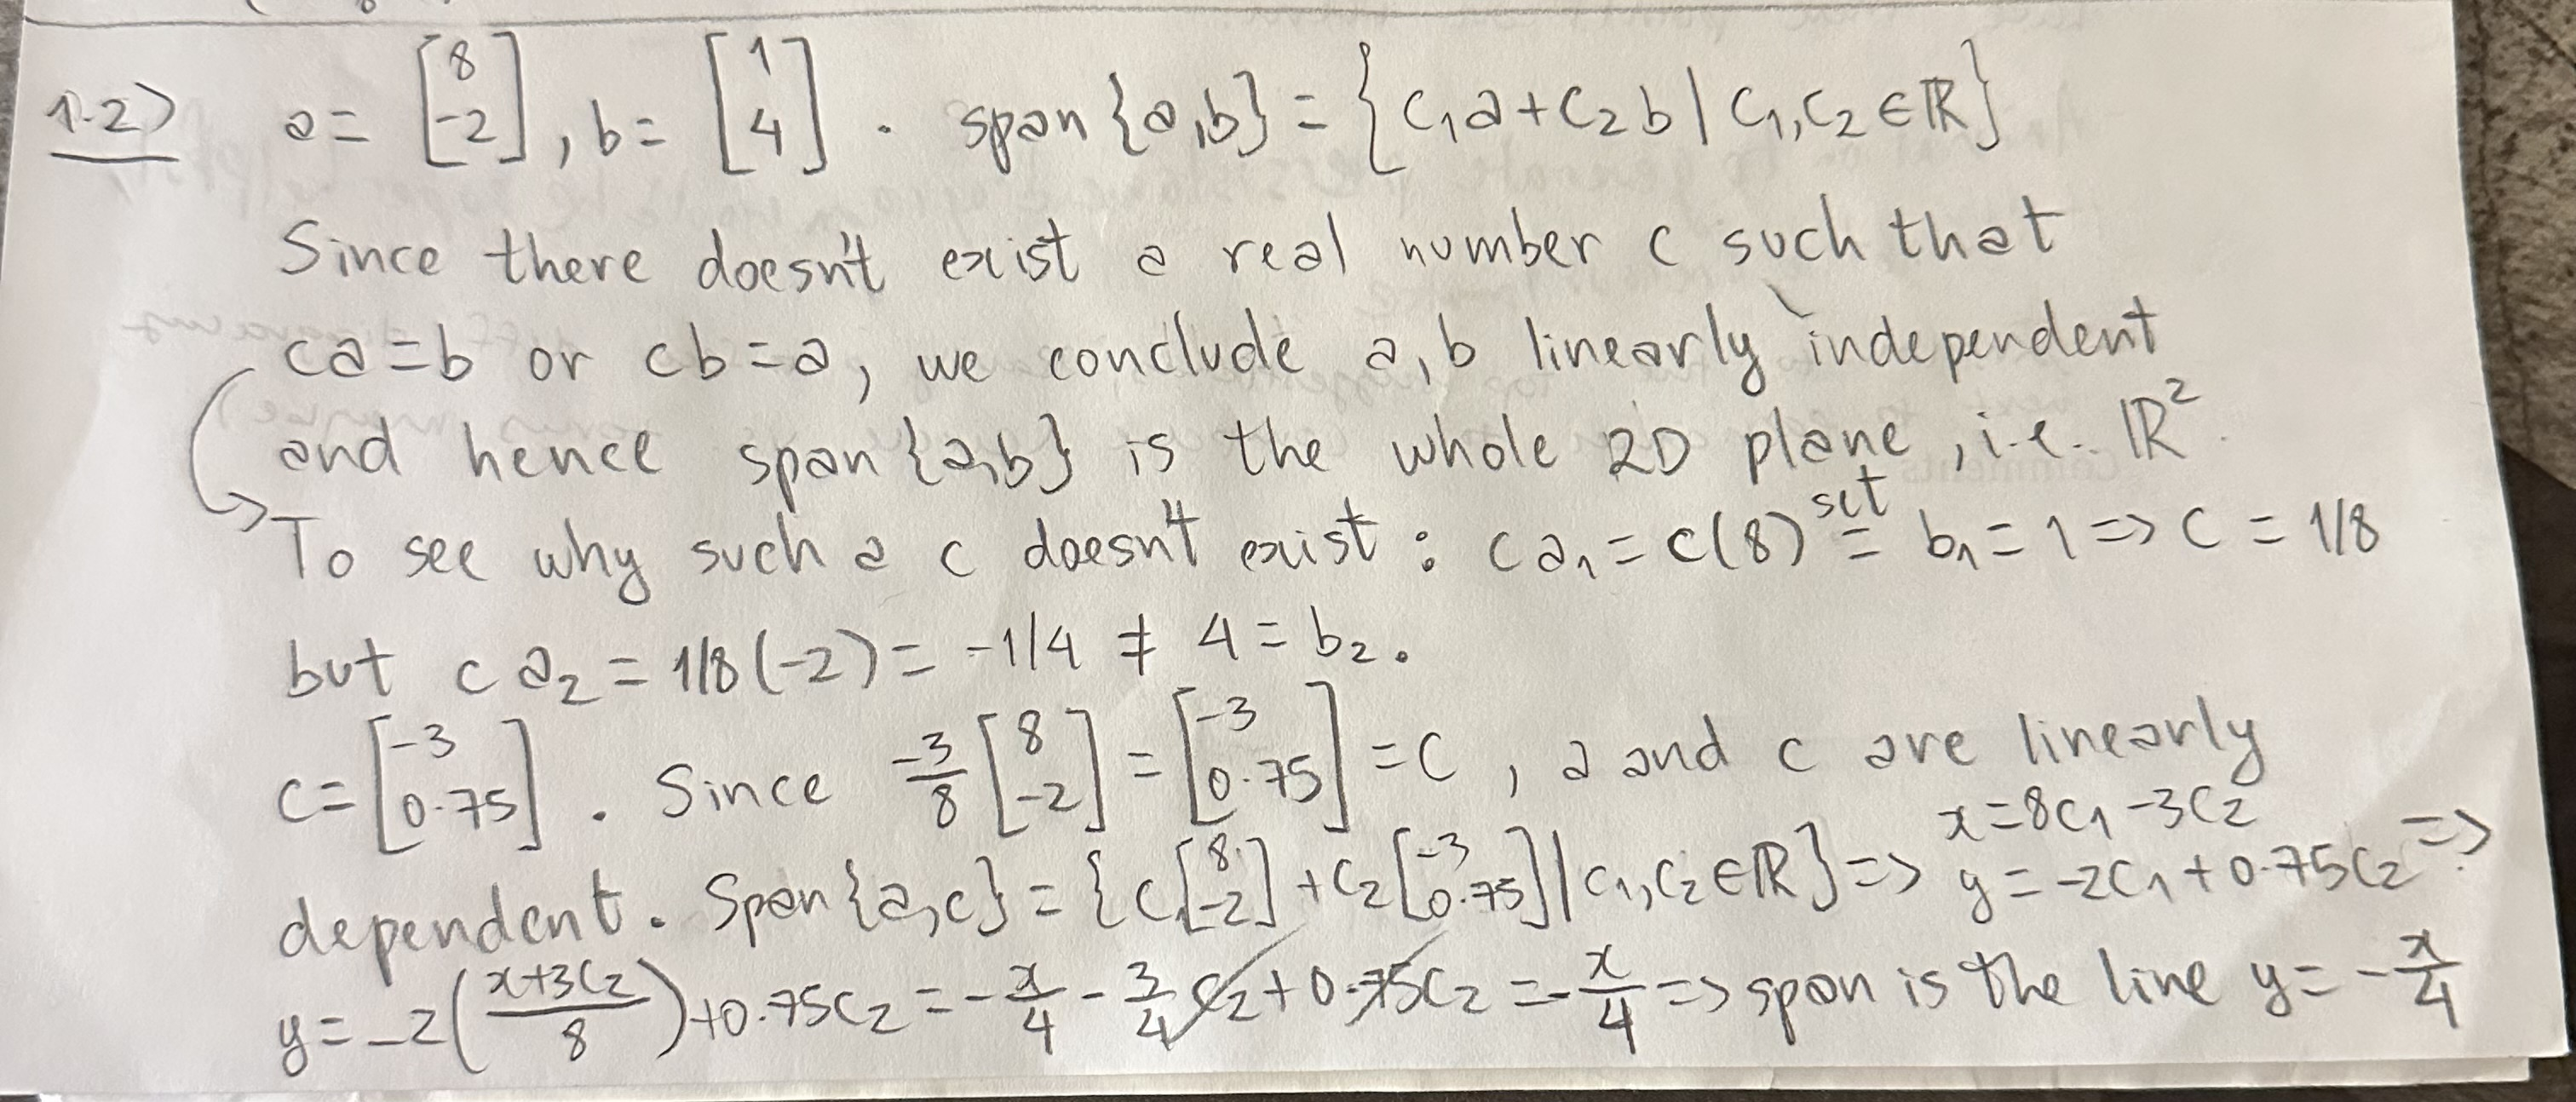

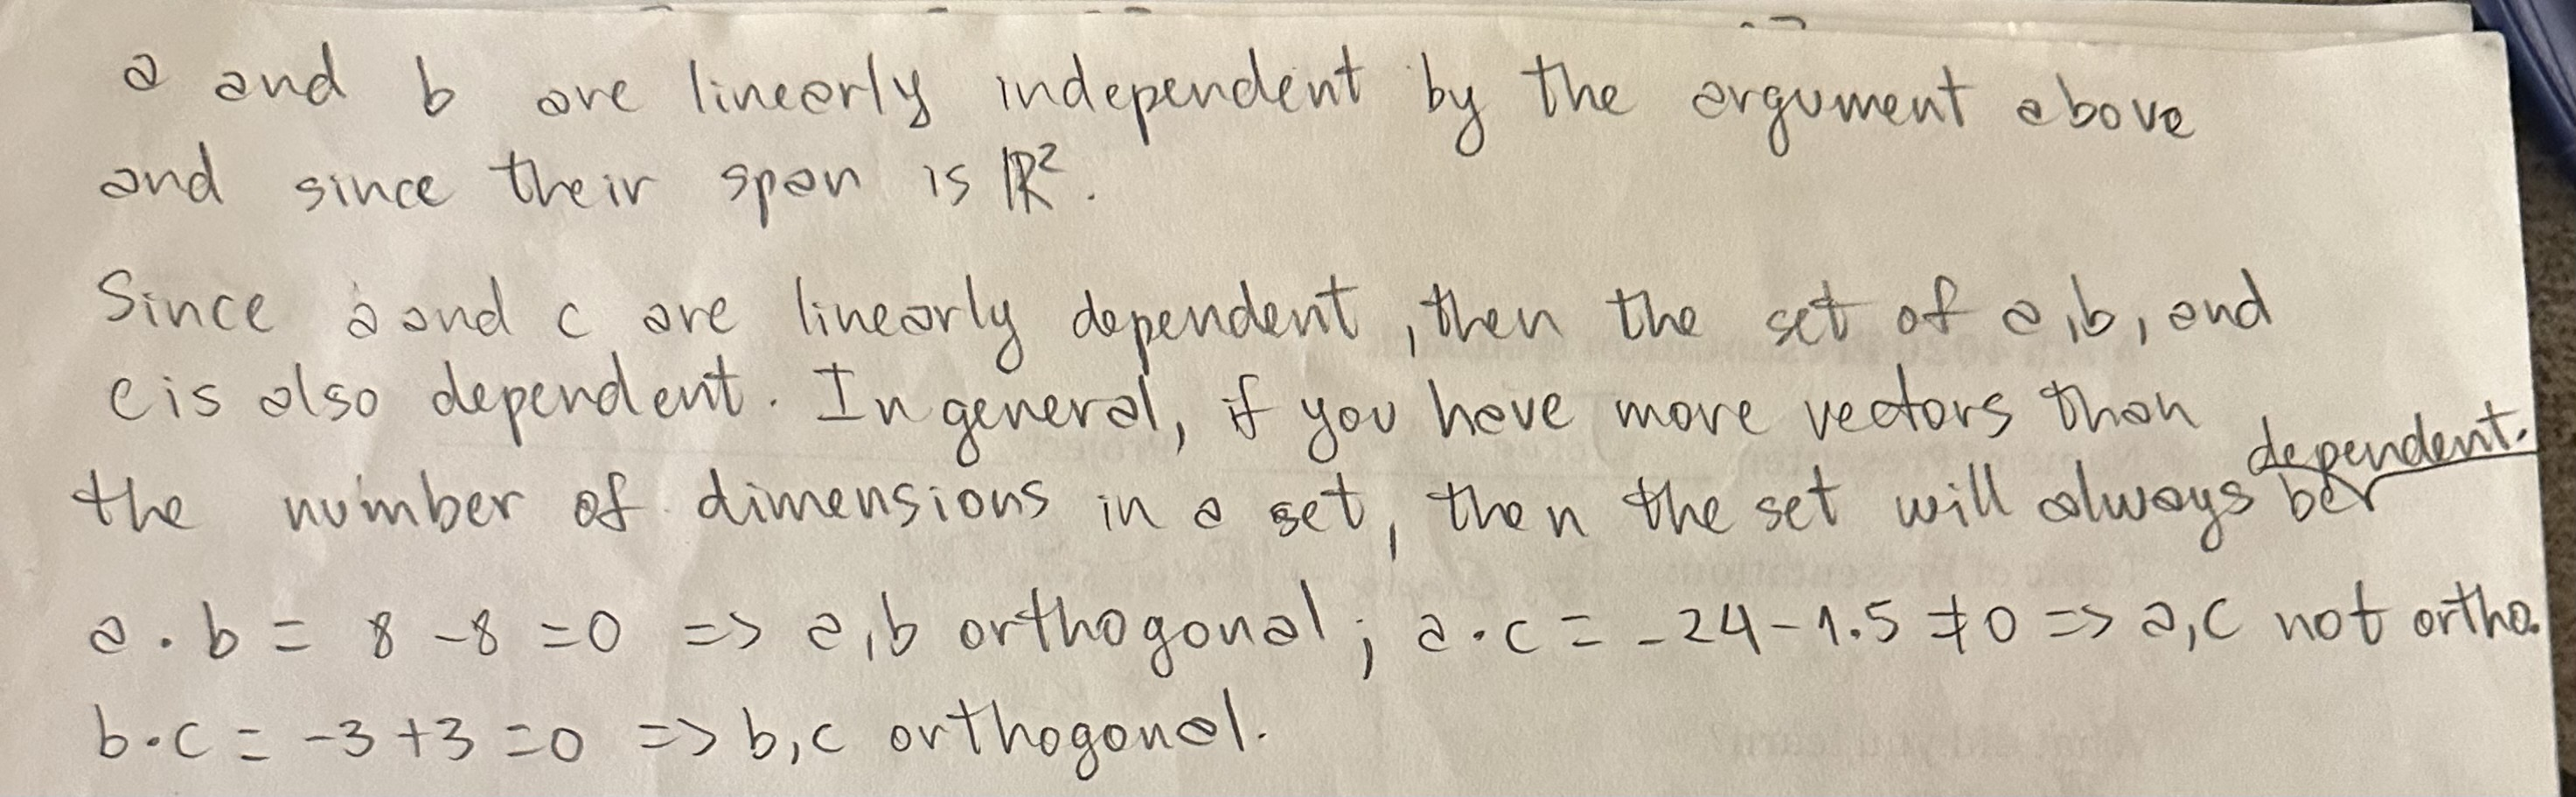

## Part 1.3: Projections (5 points)

By hand, find the point in the span of $a = \begin{bmatrix} -1 \\ 3 \end{bmatrix}$ that is closest to $b = \begin{bmatrix} 0 \\ -3 \end{bmatrix}$. Make sure to show **all** work by hand, even if you use `numpy` to verify your answer. **Also, draw a rough sketch** of the operation, including it either as an embedded image in this notebook or in your separate .pdf file.

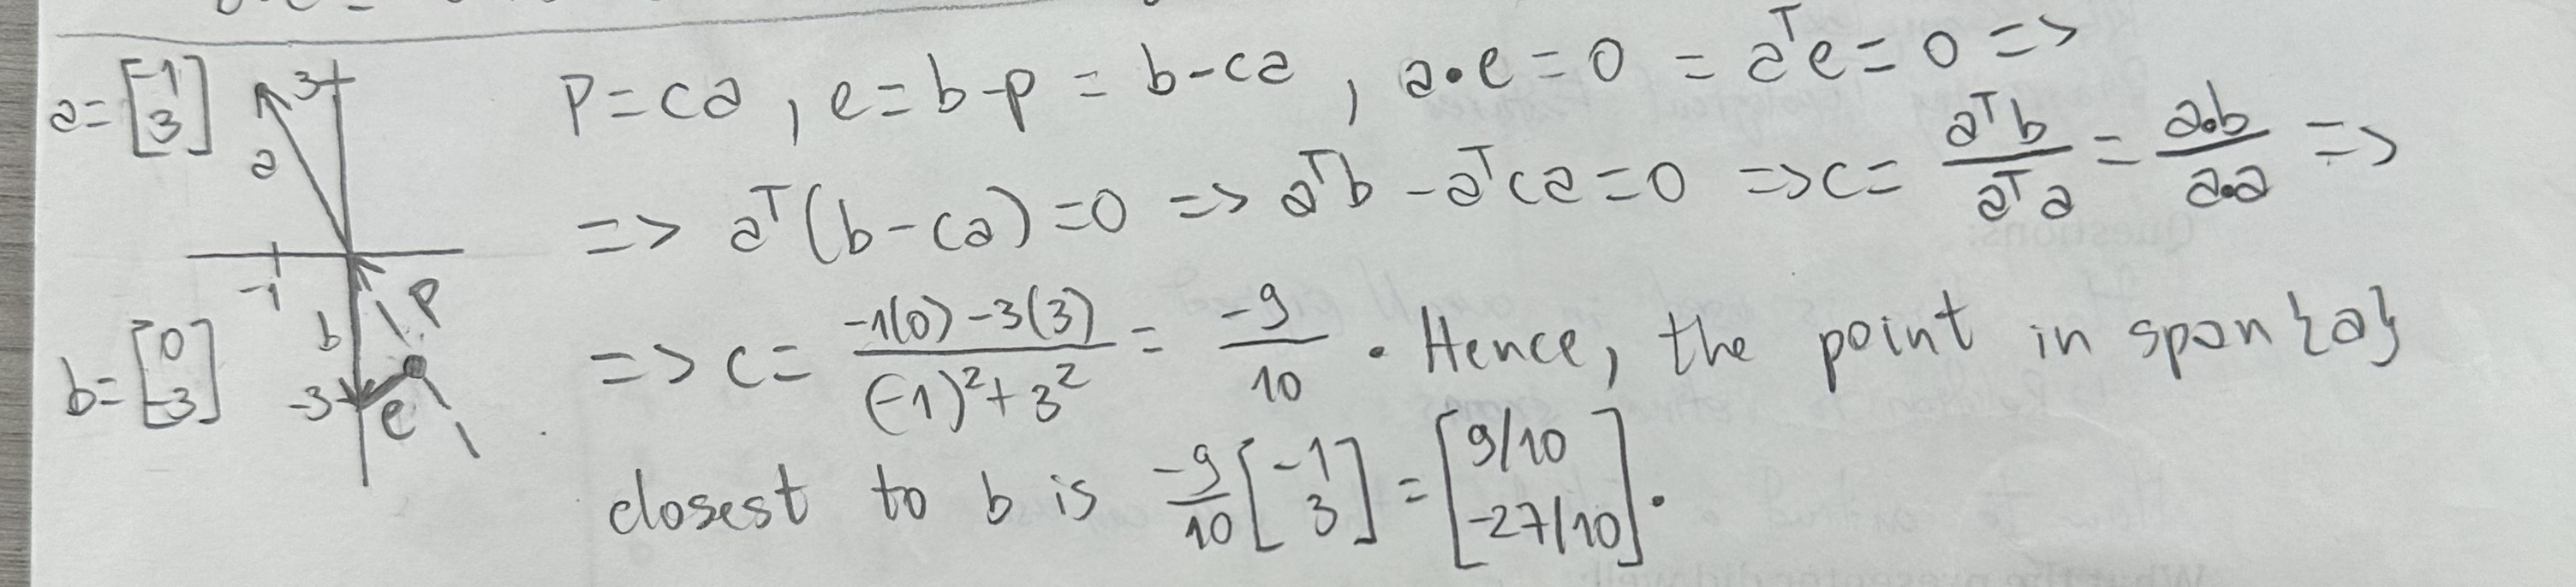

In [2]:
a = np.array([[-1], [3]])
b = np.array([[0], [-3]])

c = np.dot(a.T, b) / np.dot(a.T, a)
print(c[0][0] * a)

[[ 0.9]
 [-2.7]]


## Part 1.4: Line of Best Fit (5 points)

You are interested in if there is a relationship within your friend group between how many siblings they have and how many dates they've been on. You collect the following data from five of your friends:

| siblings | dates |
|----------|-------|
| 0        | 3     |
| 2        | 9     |
| 1        | 3     |
| 0        | 2     |
| 4        | 6     |

Find the line of best fit, by hand, for the relationship treating number of siblings as the $x$ feature and number of dates as the $y$ feature. Be sure to include an intercept term. You may verify your answer using `numpy`, but must show all work by hand.

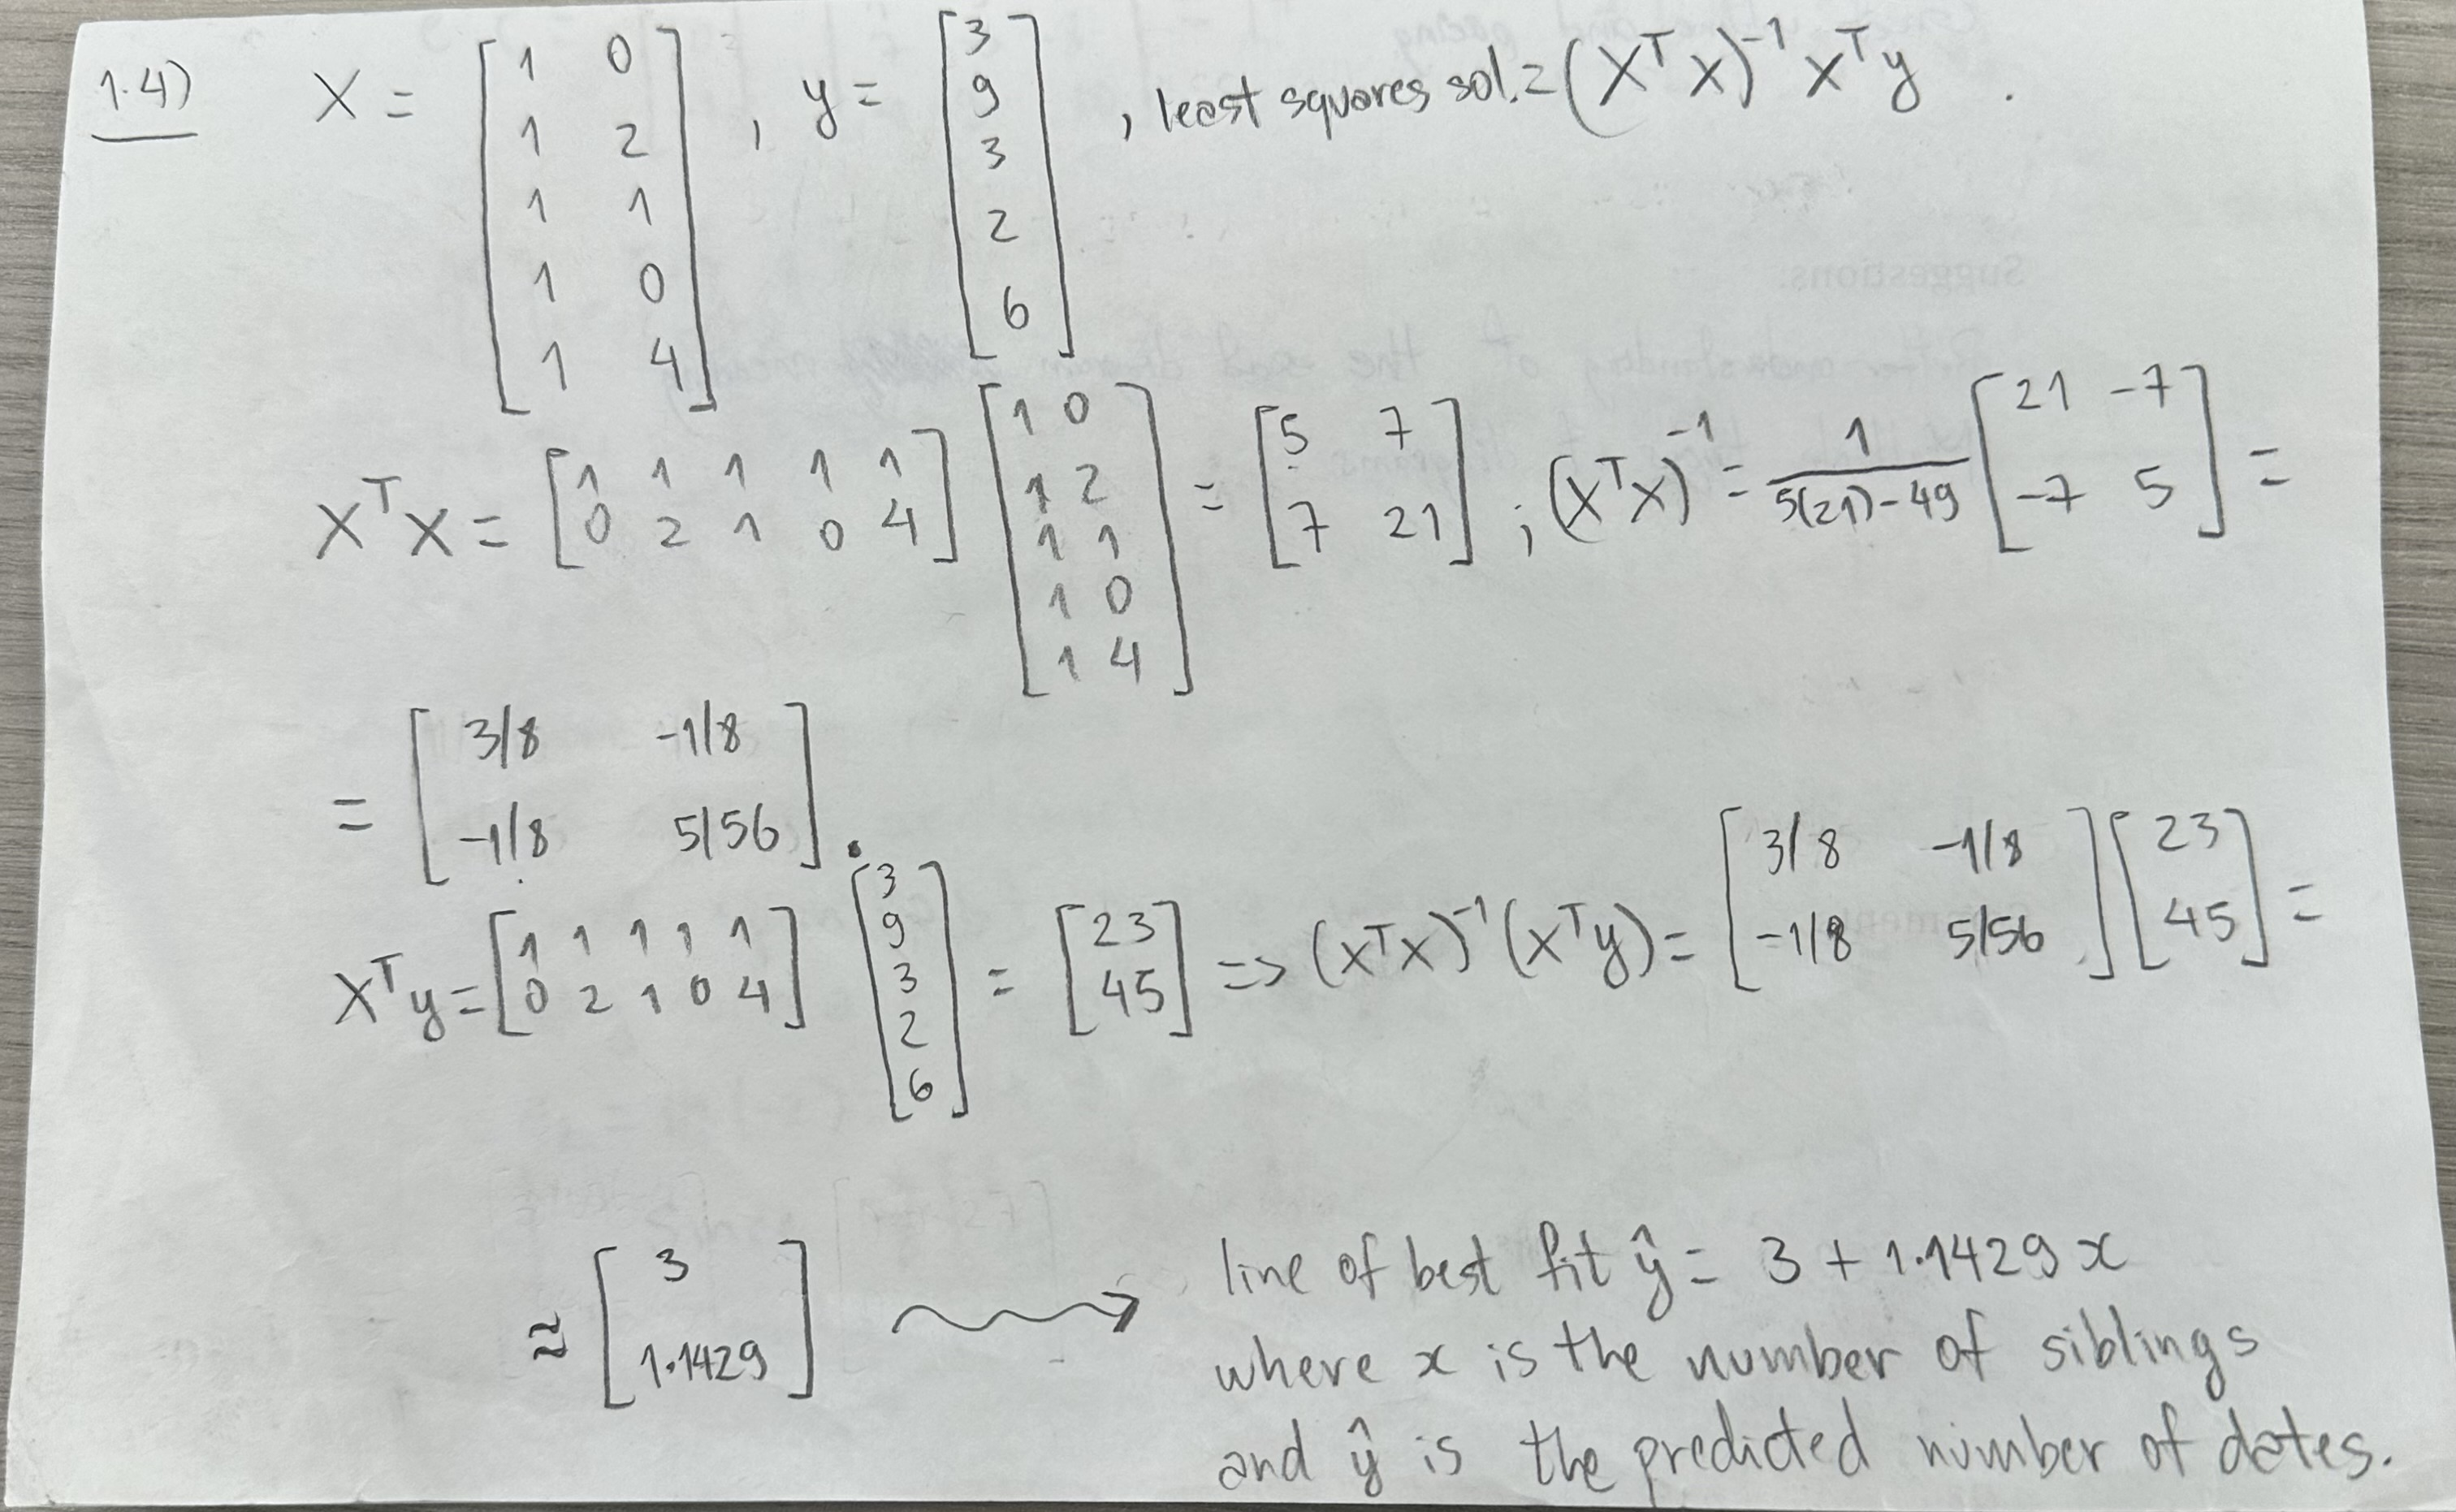

In [3]:
X = np.array([[1, 0], [1, 2], [1, 1], [1, 0], [1, 4]])
y = np.array([[3], [9], [3], [2], [6]])
LSS = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
print(f"Line of best fit = y = {LSS[0][0]: .4f} + {LSS[1][0]: 0.4f}x")

Line of best fit = y =  3.0000 +  1.1429x


# Part 2: Writing Your Own Linear Regression Functions

In this part, you will write your own linear regression functions that can (and will) be used for both Part 3 and Part 4. You must make sure that your functions pass the assert statements in each sub-part.

## Part 2.1: Line of Best Fit Function (10 points)

Write the function `line_of_best_fit`, including well written docstring, which takes as arguments `X` (an array, either 1-d or 2-d which includes all the predictor values, not including bias term) and `y` (a 1-d array which includes all corresponding response values to `X`) and returns the vector containing the coefficients for the line of best fit, including an intercept term. I have written the `add_bias_column` function below which you will want to use within your `line_of_best_fit` function. **Make sure the assert statement written in the final code cell of this sub-part passes.**

In [4]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [5]:
def line_of_best_fit(X, y):
    """ Compute Least Squares Solution for a given matrix
        Args: 1-d or 2-d matrix with predictor values w/o bias column (X -- array),
              1-d vector with corresponding response values to X (y -- array)
        Returns: vector with coefficients of line of best fit from LSS (LSS - array)
    """
    
    # Add bias column
    X_with_bias = add_bias_column(X)
    
    # Compute LSS
    LSS = np.matmul(np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)), np.matmul(X_with_bias.T, y))
    return LSS

In [6]:
X = np.array([0,2,1,0,4])
y = np.array([3,8,2,3,6])

assert (np.isclose(line_of_best_fit(X, y), np.array([3., 1.]))).all()

## Part 2.2: Prediction and Assessment Function (10 points)

Write the function `linreg_predict`, including well written docstring, which takes as arguments:

- `Xnew` (an array, either 1-d or 2-d which includes all the $p$ predictor features, not including bias term)
- `ynew` (a 1-d array which includes all corresponding response values to `Xnew`)
- `m` (a 1-d array of length $p+1$ which contains the coefficients from the `line_of_best_fit` function)

The function should return a dictionary containing four key-value pairs:

- `'ypreds'` (the predicted values from applying `m` to `Xnew`)
- `'resids'` (the residuals, the differences between `ynew` and `ypreds`)
- `'mse'` (the mean squared error)
- `'r2'` (the coefficient of determination ($R^2$) representing the proportion of variability in `ynew` explained by the line of best fit
  - You **do not** have to calculate this manually; you may use the `r2_score` function from `sklearn` (imported for you below)

**Note** you will want to use the `add_bias_column` again within your function before calculating all the outputs in your dictionary. **Also, make sure the assert statement written in the final code cell of this sub-part passes.**

In [7]:
from sklearn.metrics import r2_score

def linreg_predict(Xnew, ynew, m):
    reg_dict = {}
    Xnew_with_bias = add_bias_column(Xnew)
    ypreds = np.array(np.matmul(Xnew_with_bias, m), dtype='float')
    reg_dict['ypreds'] = ypreds
    resids = ynew - ypreds
    reg_dict['resids'] = np.round(resids, 6)
    mse = 1/Xnew.shape[0] * np.sum(resids ** 2)
    reg_dict['mse'] = mse
    r2 = r2_score(ynew, ypreds)
    reg_dict['r2'] = r2
    return reg_dict

In [8]:
def compare_dicts(dict1, dict2):
    if dict1.keys() != dict2.keys():
        return False

    for key in dict1:
        if not np.isclose(dict1[key], dict2[key]).all():
            return False

    return True

expected_out = {'ypreds': np.array([3., 5., 4., 3., 7.]),
                'resids': np.array([0., 3., -2., 0., -1.]),
                'mse': 2.8,
                'r2': 0.4444444444444444}

X = np.array([0,2,1,0,4])
y = np.array([3,8,2,3,6])

m = line_of_best_fit(X, y)
out = linreg_predict(X, y, m)

assert compare_dicts(expected_out, out)

# Part 3: Overwatch Simple Linear Regression

For this problem you will use the `df_owl_2018.csv` file in your Homework Module on Canvas. This data set contains statistics from the 2018 Overwatch League (cleaned from [this website](https://overwatchleague.com/en-us/statslab?statslab=heroes)). You do not need to be an expert in Overwatch to complete this problem; I will provide all the context you need below. 

We are interested in a specific hero character you can play, Mercy. Mercy's primary purpose is to heal others. Sometimes when she is healing another character, that character manages to defeat an opponent. This counts as a `Defensive Assists` statistic. In this part, we will see if we can predict how many `Defensive Assists` a player achieves as Mercy given the amount of `Healing Done`, in thousands.

In [9]:
import pandas as pd

df_owl = pd.read_csv('df_owl_2018.csv')
df_owl.head()

start_time  match_id                       stage map_type  \
0  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
1  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
2  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
3  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   
4  2018-01-11 00:12:00     10223  Overwatch League - Stage 1  PAYLOAD   

  map_name     player                 team     hero    role  \
0   Dorado  Agilities  Los Angeles Valiant    Genji  Damage   
1   Dorado     Danteh  San Francisco Shock    Genji  Damage   
2   Dorado     Danteh  San Francisco Shock  Junkrat  Damage   
3   Dorado     Danteh  San Francisco Shock   Tracer  Damage   
4   Dorado       Envy  Los Angeles Valiant     D.Va    Tank   

   Ability Damage Done  ...  Ultimates Used  Unscoped Accuracy  Unscoped Hits  \
0                  0.0  ...               8                0.0              0   
1                  0.0  ...               1                0.0              0   
2                  0.0  ...               3                0.0              0   
3                  0.0  ...               3                0.0              0   
4                  0.0  ...              23                0.0              0   

   Unscoped Shots  Venom Mine Kills  Weapon Accuracy  Weapon Kills  \
0               0                 0         0.273585             0   
1               0                 0         0.166667             0   
2               0                 0         0.137500             0   
3               0                 0         0.327001             0   
4               0                 0         0.314785             0   

   Whole Hog Efficiency  Whole Hog Kills  of Rockets Fired  
0                   0.0                0               0.0  
1                   0.0                0               0.0  
2                   0.0                0               0.0  
3                   0.0                0               0.0  
4                   0.0                0               0.0  

[5 rows x 261 columns]

## Part 3.1: Data Cleaning (5 points)

Before starting, we need to do two things:
1. subset the data set so that it only includes Mercy observations
    - **hint:** you should remove all `hero` values besides `Mercy`
2. divide the `Healing Done` column by `1000` so that the values are in thousands of points
    - this will assist in the interpretation of the slope
  
You do not have to, but it may help (and I recommend) to further clean the data to keep only the two columns we are interested in, `Healing Done` and `Defensive Assists`; or to simply cast those to arrays called `mercy_X` and `mercy_y` (respectively).

In [10]:
df_owl = df_owl[df_owl.hero == 'Mercy']

In [11]:
df_owl['Healing Done'] = df_owl['Healing Done']/1000
df_owl = df_owl[['Healing Done', 'Defensive Assists']]
df_owl= df_owl.reset_index(drop=True)
df_owl

Healing Done  Defensive Assists
0       16.176682                 38
1       20.522726                 32
2       17.934605                 41
3       21.049549                 34
4       12.896022                 22
..            ...                ...
590     16.010130                 35
591     15.442231                 17
592     14.930190                 18
593     16.864608                 17
594     13.459126                 29

[595 rows x 2 columns]

## Part 3.2: Cross Validate, Predict, MSE, and $R^2$ (10 points)

Use the `train_test_split` function I've imported for you below to create a single-fold (70-30 split) cross validation set (i.e. `Xtrain`, `Xtest`, `ytrain`, `ytest`) using the Mercy data you cleaned in Part 3.1. In other words, for example, the `Xtrain` set should contain a random subset of about 70\% of the `Healing Done` values.

Using your functions from Part 2, apply the `line_of_best_fit` function to the training data. Then, use the `linreg_predict` function with the test data (and the output from the first function). Print out the resulting cross validated $MSE$ and $R^2$ values and **then**, in a markdown cell, interpret $R^2$ and discuss if you think it is reasonable based on that value to predict `Defensive Assists` with `Healing Done`.

In [12]:
from sklearn.model_selection import train_test_split

X = np.array(df_owl.iloc[:, 0])
y = np.array(df_owl.iloc[:,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3000)
thetas = line_of_best_fit(X_train, y_train)
reg_dict = linreg_predict(X_test, y_test, thetas)
print("MSE: ", reg_dict['mse'])
print("r2: ", reg_dict['r2'])

MSE:  49.64068305620738
r2:  0.6387774894465668


Our r2 score suggests that our Least Squares Solution can explain about 64% of the variance in 'Defensive Assists' when using 'Healing Done' to predict the assists. I think this result is good since having any advantage on getting more defensive assists is helpful for professional OW matches, and our model is roughly speaking, correct 64% of the times.

## Part 3.3: Use `sklearn` and Compare (5 points)

Use the `LinearRegression` function from `sklearn` to fit the training data (redefined below as `Xtrain_sklearn`, assuming you named it `Xtrain` in Part 3.2) and then use the `.predict` function to predict the $y$-values for the test data (redefined below as `Xtest_sklearn`, assuming you named it `Xtest` in Part 3.2).

Use the provided `get_mse` function to print out the $MSE$ and then use the `r2_score` function to calculate the $R^2$ value. Compare these to the values you got from your own functions in the previous part. Are they the same? Discuss why they are or why they are not **in a markdown cell**.

In [13]:
from sklearn.linear_model import LinearRegression
X_train_sklearn = X_train.reshape(-1, 1)
X_test_sklearn = X_test.reshape(-1, 1)

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_true - y_pred) ** 2)

lin_reg = LinearRegression().fit(X_train_sklearn, y_train)
y_pred = lin_reg.predict(X_test_sklearn)
mse_sklearn = get_mse(y_test, y_pred)
r2_sklearn = r2_score(y_test, y_pred)
print("MSE (sklearn): ", mse_sklearn)
print("r2 (sklearn): ", r2_sklearn)

MSE (sklearn):  49.640683056207386
r2 (sklearn):  0.6387774894465668


In [14]:
print(f"MSE difference: {reg_dict['mse'] - mse_sklearn}, r2 difference: {reg_dict['r2'] - r2_sklearn}")

MSE difference: -7.105427357601002e-15, r2 difference: 0.0


The difference between these two are both zero which shouldn't be surprising since our functions to get the line of best fit are essentially doing what sklearn's LinearRegression does under the hood. The only real difference is that maybe sklearn does it slightly faster since I assume they optimize their code to make it more efficient when working with larger datasets.

## Part 3.4: Plot and Interpret the Full Line (5 points)

Now, fit the regression model to the full data set, then use the `show_fit()` function below to plot it and recover the final best fit line for the model. **Note** that your `line_of_best_fit` function is the only one you need here, and that you will have to remember which value in the output vector is the slope and which is the intercept.

**Note Also** that you will need to do Part 3.3 (or, at least get use the `get_mse` function) for this to work.

**In a markdown cell**, interpret both the slope and intercept in the context of the problem, explaining what they mean (as best as you can). **Recall** you put `Healing Done` in thousands of points, which will affect the wording of your interpretation of the slope.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def show_fit(X, y, slope, intercept):
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')

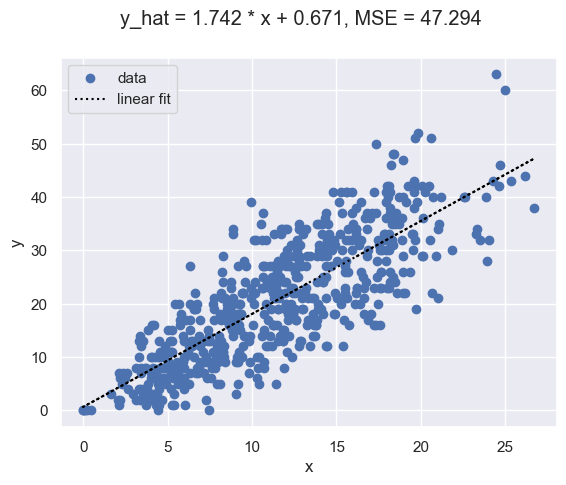

In [16]:
thetas_fulldata = line_of_best_fit(X, y)
show_fit(X, y, thetas_fulldata[1], thetas_fulldata[0])

Our line of best fit suggests that when the healing done by Mercy is 0 thousand pts, the predicted 'Defensive Assists' she'll get is 0.671. On the other hand, the slope suggests that the predicted "Defensive Assists" goes up by 1.742 times the number of thousand pts, e.g., if Mercy does 10 thousand points, the predicted 'Defensive Assists" goes up by $1.742*10 = 17.42$.

## Part 3.5: Check Assumptions and Make Recommendations (5 points)

Use plots to check to see if the residuals meet the assumptions for performing a linear regression:
1. independence
2. constant variance/linearity
3. normality

**Note** that you will want to use your `linreg_predict` function, using the **full data set** as your `Xnew` and `ynew` values, to get the residuals for the purposes of this question.

Then, **in a markdown cell**, write 3-4 sentences about whether the model meets the assumptions, what that tells you about the usefulness of the model, and recommendations for next steps (if any).

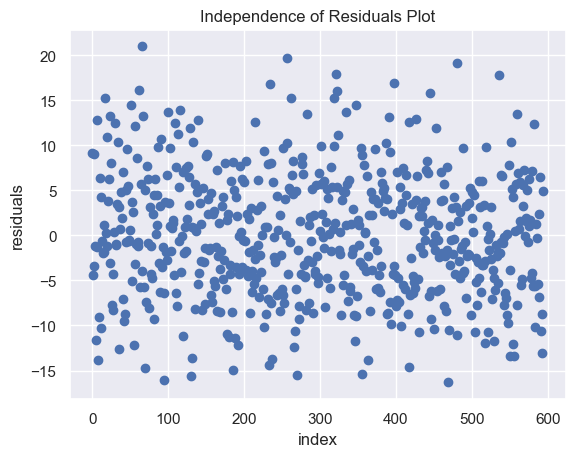

In [17]:
import scipy.stats as stats
import pylab as py
import matplotlib.pyplot as plt

thetas_fulldata = line_of_best_fit(X, y)
reg_dict = linreg_predict(X, y, thetas_fulldata)

plt.scatter(x = range(len(y)), y = reg_dict['resids'])
plt.xlabel('index')
plt.ylabel('residuals')
plt.title("Independence of Residuals Plot")
plt.show()

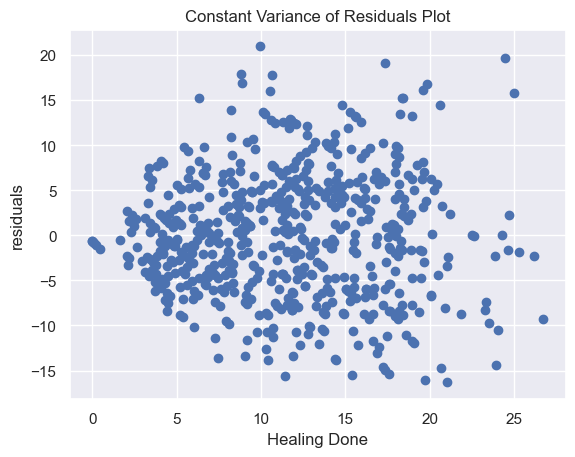

In [18]:
plt.scatter(x=X, y=reg_dict['resids'])
plt.xlabel('Healing Done')
plt.ylabel('residuals')
plt.title("Constant Variance of Residuals Plot")
plt.show()

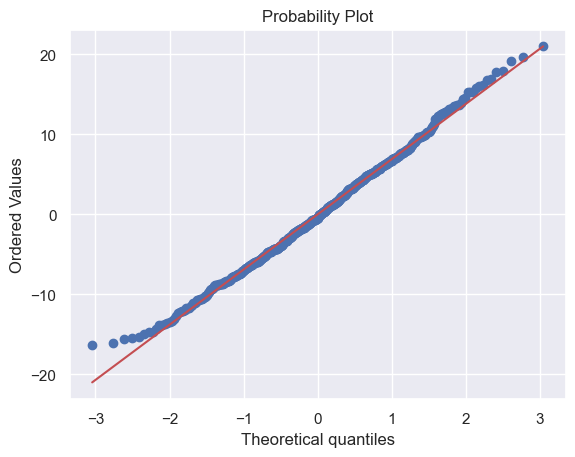

In [19]:
stats.probplot(reg_dict['resids'], dist="norm", plot=py)
py.show()

We use the first plot above to check independence of our residuals. Since we don't see any patterns between the residuals, it suggests they are independent, meeting the first assumption for our Linear Regression model.
From the second plot we check if our residuals have constant variance. We see that there seems to be a fairly random scatter as we move from left to right, without much curving/funneling/tunneling. Hence, our second assumption is met.
Lastly, the third plot lets us check if our errors are normally distributed. Since we see an approximately straight, 45 degree line, it means our errors are normal. We conclude that all of our assumptions are met and we can say the Linear Regression model is a valid tool to analyze the relationship between Mercy's healing done and the number of defensive assists she gets. So far, this is the dataset that has had the best met linear regression conditions I've seen.

# Part 4: Fuel Emissions Regression

In this problem you will use the `FuelConsumptionCo2.csv` file (from your Homework Module on Canvas) to build two candidate models to predict a vehicle's Carbon Dioxide Emissions (`CO2EMISSIONS`).

In [20]:
df_fuel = pd.read_csv('FuelConsumptionCo2.csv')
df_fuel.dropna(inplace=True)
df_fuel.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

## Part 4.1: Multiple Regression (10 points)

Our first model will be a multiple regression model where we try to predict `CO2EMISSIONS` with `ENGINESIZE`, `CYLINDERS` and `FUELCONSUMPTION_COMB_MPG`. Be sure to complete all the following steps:

#### Part 4.1.1

Create your `X` and `y` arrays. Make sure that:

- You scale the $x$ features **using scale normalization**
- You do **not** include a bias column in `X`

Defining the feature list:

    x_feat_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']

may help. Your `X` should pass the assert statement in the cell before Part 4.1.2. **Note** if you use a different type of normalization besides scale normalization (i.e. other than simply dividing all features by their corresponding standard deviations) the assert will not pass.

In [21]:
x_feat_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']
X = df_fuel[x_feat_list]
for col in list(X.columns):
    X[col] = X[col]/X[col].std()
X = np.array(X)
y = np.array(df_fuel.CO2EMISSIONS)

C:\Users\hafid\AppData\Local\Temp\ipykernel_18756\1911901504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col]/X[col].std()


In [22]:
# check if 
assert np.isclose(X[0], np.array([1.41531251, 2.19568706, 4.77566865])).all()

#### Part 4.1.2

Using single-fold cross validation with a 70-30 split, create `Xtrain`, `Xtest`, `ytrain`, and `ytest`.

Fit the model using **your own** `line_of_best_fit` function to `Xtrain` and `ytrain`.

Then pass `Xtest`, `ytest`, and the output from the `line_of_best_fit` to your `linreg_predict` function, saving that as something. 

Print out the cross-validated $MSE$ and $R^2$ values. You do not have to comment on their values yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.2.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3000)
thetas_train = line_of_best_fit(X_train, y_train)
reg_dict = linreg_predict(X_test, y_test, thetas_train)
mse = reg_dict['mse']
r2 = reg_dict['r2']
print("MSE: ", mse)
print("r2: ", r2)

MSE:  272.1560847492162
r2:  0.9317362239544122


#### Part 4.1.3

Now fit the full model using your `line_of_best_fit` function, and generate the residuals using your `linreg_predict` function. Create 5 residual plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the residuals
- A plot of `ENGINESIZE` vs. the residuals
- A plot of `CYLINDERS` vs. the residuals
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the residuals
- A normal probability quantile-quantile plot of the residuals

You do not have to comment on these plots yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.2.

In [24]:
thetas_fulldata = line_of_best_fit(X, y)
reg_dict_fulldata = linreg_predict(X, y, thetas_fulldata)

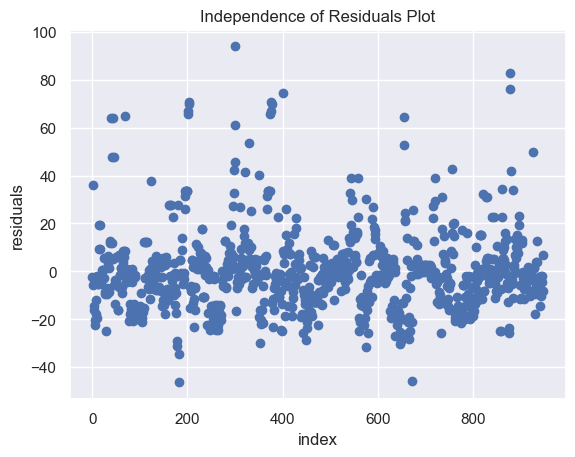

In [25]:
plt.scatter(x = range(len(y)), y = reg_dict_fulldata['resids'])
plt.xlabel('index')
plt.ylabel('residuals')
plt.title("Independence of Residuals Plot")
plt.show()

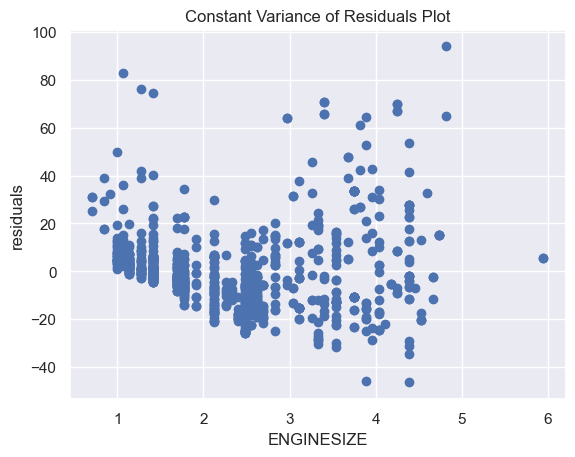

In [26]:
plt.scatter(x=X[:,0], y=reg_dict_fulldata['resids'])
plt.xlabel('ENGINESIZE')
plt.ylabel('residuals')
plt.title("Constant Variance of Residuals Plot")
plt.show()

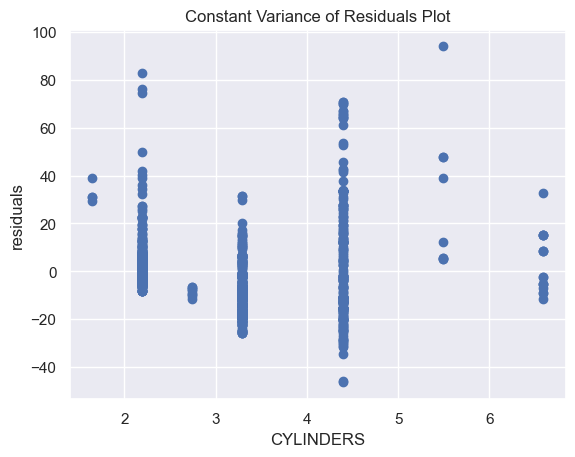

In [27]:
plt.scatter(x=X[:,1], y=reg_dict_fulldata['resids'])
plt.xlabel('CYLINDERS')
plt.ylabel('residuals')
plt.title("Constant Variance of Residuals Plot")
plt.show()

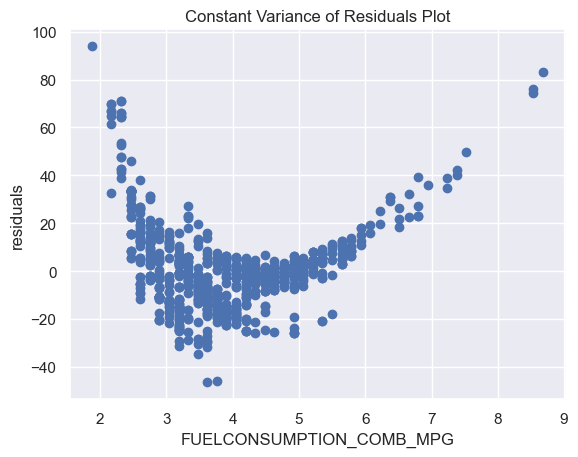

In [28]:
plt.scatter(x=X[:,2], y=reg_dict_fulldata['resids'])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('residuals')
plt.title("Constant Variance of Residuals Plot")
plt.show()

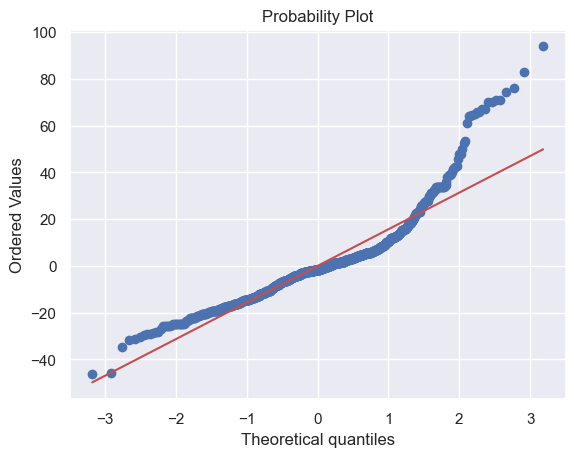

In [29]:
stats.probplot(reg_dict_fulldata['resids'], dist="norm", plot=py)
py.show()

## Part 4.2: Polynomial Regression (10 points)

Our second model will be a polynomial regression model where we try to predict `CO2EMISSIONS` with `FUELCONSUMPTION_COMB_MPG`. Be sure to complete all the following steps:

#### Part 4.2.1

Use the `PolynomialFeatures` and `.fit_transform` functions to convert the `FUELCONSUMPTION_COMB_MPG` ($x$) feature into an array (**CALL THIS `X_poly`**) that includes **four** columns corresponding to building a quartic model for `CO2EMISSIONS` ($y$) along the lines of: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4$. I have started the process for you by defining the array containing only our target feature, `X_fuel`.

**Note** that the `.fit_transform` function will produce by default **five** columns, including the bias column. Your functions take arrays that do not have this, so you should remove it.

Your `X_poly` should pass the assert statement in the cell before Part 4.2.2. **Note**: Do *not* scale your features (it is unnecessary, since there is really only one, albeit raised to different powers, and will cause an assert error).

In [30]:
from sklearn.preprocessing import PolynomialFeatures

X_fuel = np.array(df_fuel['FUELCONSUMPTION_COMB_MPG']).reshape(-1,1)
y = np.array(df_fuel.CO2EMISSIONS)
degree = 4
poly_feat = PolynomialFeatures(degree=degree)
X_poly = poly_feat.fit_transform(X_fuel)
X_poly = X_poly[:,1:]

In [31]:
assert np.isclose(X_poly[0], np.array([33, 1089, 35937, 1185921])).all()

#### Part 4.2.2

Using single-fold cross validation with a 70-30 split, create `Xtrain`, `Xtest`, `ytrain`, and `ytest` (from `X_poly` from Part 4.2.1 and `y` as defined before).

Fit the model using **your own** `line_of_best_fit` function to `Xtrain` and `ytrain`.

Then pass `Xtest`, `ytest`, and the output from the `line_of_best_fit` to your `linreg_predict` function, saving that as something. 

Print out the cross-validated $MSE$ and $R^2$ values. You do not have to comment on their values yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.1.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=3000)
thetas_poly = line_of_best_fit(X_train, y_train)
poly_reg_dict = linreg_predict(X_test, y_test, thetas_poly)
print("MSE (quartic regression): ", poly_reg_dict['mse'])
print("r2 (quartic regression): ", poly_reg_dict['r2'])

MSE (quartic regression):  12.056480730402146
r2 (quartic regression):  0.9969759232051104


#### Part 4.2.3

Now fit the full model using your `line_of_best_fit` function, and generate the residuals using your `linreg_predict` function. Create 3 residual plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the residuals
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the residuals
- A normal probability quantile-quantile plot of the residuals

You do not have to comment on these plots yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.1.

In [33]:
thetas_poly_full = line_of_best_fit(X_poly, y)
poly_dict_full = linreg_predict(X_poly, y, thetas_poly_full)

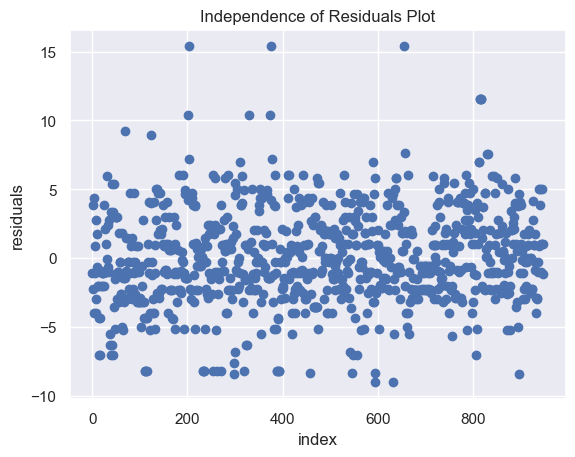

In [34]:
plt.scatter(x = range(len(y)), y = poly_dict_full['resids'])
plt.xlabel('index')
plt.ylabel('residuals')
plt.title("Independence of Residuals Plot")
plt.show()

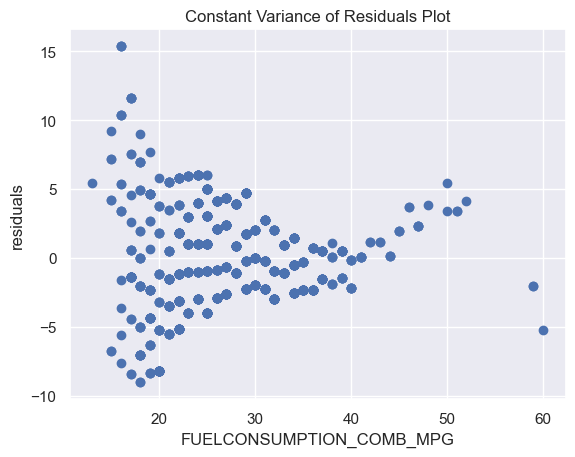

In [35]:
plt.scatter(x=X_poly[:,0], y=poly_dict_full['resids'])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('residuals')
plt.title("Constant Variance of Residuals Plot")
plt.show()

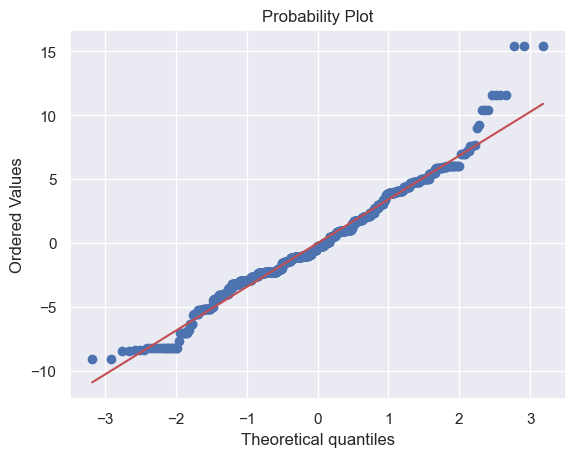

In [36]:
stats.probplot(poly_dict_full['resids'], dist="norm", plot=py)
py.show()

## Part 4.3: Conclusions (10 points)

**In a markdown cell**, give a *lengthy and **detailed*** discussion of the two candidate models. Discuss each of their strengths/weaknesses/benefits (i.e. which model had the better $R^2$? which had the better $MSE$? which assumptions were met for each model and which were not?). Then, **make a decision** about which model you would suggest (if you **had** to choose) is most appropriate to use for predicting a vehicle's Carbon Dioxide Emissions. Do you have any thoughts about improving either/both of these models? **Discuss this as well.**

MSE (quartic regression):  12.056480730402146; MSE (multiple regression):  272.1560847492162

r2 (quartic regression):  0.9969759232051104; r2 (multiple regression):  0.9317362239544122

The quartic model using 'FUELCONSUMPTION_COMB_MPG' to predict a vehicle's Carbon Dioxide Emissions had a better MSE and r2 score compared to the multiple regression model that uses 'ENGINESIZE', 'CYLINDERS', and 'FUELCONSUMPTION_COMB_MPG' as predictor variables. 

Conditions multiple regression model met:
- Independence of residuals;
- Constant variance for 'ENGINESIZE' and for 'CYLINDERS'

Conditions multiple regression model did not meet:
- Constant variance plot for 'FUELCONSUMPTION_COMB_MPG' has a parabolic shape and we want to see a random spread of points without any visible shapes in order for this condition to be met;
- Residuals do not look normally distributed as the probability plot points are not "roughly" forming a straight (45 deg. angle with the x axis) line

Conditions quartic regression model met:
- Normally distributed residuals;

Conditions quartic regression model did not meet:
- Residuals are not independent since we can see horizontal lines formed by several points indicating multiple cars in our data have the same residuals;
- The variances of the 'FUELCONSUMPTION_COMB_MPG' variable are not constant since we can see a shape formed rather than a random spread of points. This was not surprising to see since we also saw that this variable didn't have constant variance in the multiple regression case

In my opinion, none of these models are appropriate for predicting a given vehicle's carbon dioxide emission. In order to come up with a better model, I'd first fit a multiple regression model with all the variables (except target feature) with Lasso regularization to perform feature selection. I'd then fit another model only with the selected features and experiment with making some of these features polynomial if needed. Lastly, I'd re-run the checks to see if the conditions are met and conclude whether a linear model is appropriate for this regression task or not.

If I absolutely had to choose, I'd pick the multiple regression model since it met two more conditions than the quartic regression model.